In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [2]:
df=pd.read_csv(r'C:\Users\ACER\Downloads\amazon_prime_impact.csv')
df.head()

,user_id,is_prime,total_purchases,avg_order_value,total_spent,returns
0,1,1,8,60.55,484.38,0
1,2,0,4,58.00,231.99,1
2,3,0,5,52.48,262.41,0
3,4,0,10,29.27,292.70,1
4,5,1,3,42.75,128.24,1


In [3]:
conn=sqlite3.connect(":memory:")
df.to_sql("Amazon_users",conn,index=False,if_exists="replace")

1000

conn = sqlite3.connect(":memory:")

This creates an in-memory SQLite database.

":memory:" means the database is temporary and stored in RAM, so it will disappear once the connection is closed or the program ends.

Useful for quick tests or temporary data manipulation without creating a physical file.

df.to_sql("Amazon_users", conn, index=False, if_exists="replace")

This converts your pandas DataFrame df into a SQL table and writes it to the SQLite database connected by conn.

"Amazon_users" is the name of the table to create or replace.

index=False means the DataFrame's index is not written as a separate column in the SQL table.

if_exists="replace" means if the table "Amazon_users" already exists, it will be dropped and recreated with the new data from df.

If you had used "append" instead, it would add rows to the existing table instead of replacing it.

Summary:
You create a temporary in-memory database.

You write your pandas DataFrame df into a SQL table called "Amazon_users" in that database.

The table will overwrite any existing table of the same name.

The DataFrame index is excluded from the table columns.

In [15]:
query1="""
SELECT
   is_prime,
   AVG(total_purchases) AS avg_purchases,
   AVG(avg_order_value) AS avg_order,
   AVG(total_spent) AS avg_spent,
   AVG(returns) AS avg_returns
FROM amazon_users
GROUP BY is_prime;
"""

SELECT is_prime
You're grouping users based on whether they are Prime members (1) or not (0).

🔹 AVG(total_purchases) AS avg_purchases
Calculates the average number of purchases per user for each group (Prime vs. Non-Prime).

🔹 AVG(avg_order_value) AS avg_order
Computes the average of each user's average order value for each group.

🔹 AVG(total_spent) AS avg_spent
Averages the total amount spent by users in each group.

🔹 AVG(returns) AS avg_returns
Calculates the average number of product returns by users in each group.

🔹 FROM amazon_users
Refers to your source table containing user-level metrics.

🔹 GROUP BY is_prime
Splits the data into two groups: Prime (1) and Non-Prime (0).

🎯 Purpose:
To compare key behavior metrics (purchases, spending, returns) between Prime and Non-Prime Amazon users.

In [16]:
sql_result=pd.read_sql_query(query1,conn)

In [25]:
sql_result

,is_prime,avg_purchases,avg_order,avg_spent,avg_returns
0,0,4.927461,49.738515,244.38209,0.459413
1,1,5.042755,48.855487,247.85000,0.486936



pd.read_sql_query(...)	A Pandas function that reads the result of a SQL query and loads it into a DataFrame (table-like structure in Python).

query1 -	A string that contains the actual SQL command you want to run (defined earlier).

conn  -	The database connection object, which tells Pandas where to execute the query.

sql_result =	Stores the result of the SQL query into a variable named sql_result, so you can use or analyze it later in Python.

🎯 Purpose:
It executes a SQL query from Python, fetches the results from the database, and loads the output into a Pandas DataFrame for easy analysis or visualization.

-------Average Spend by Prime status---------         

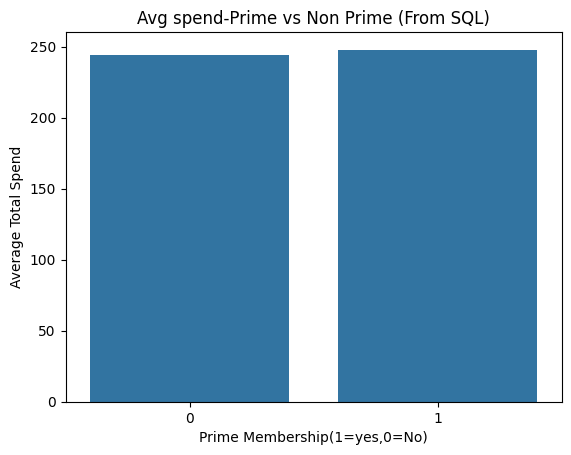

In [19]:
sns.barplot(x='is_prime',y='avg_spent',data=sql_result)
plt.title("Avg spend-Prime vs Non Prime (From SQL)")
plt.xlabel("Prime Membership(1=yes,0=No)")
plt.ylabel("Average Total Spend")
plt.show()

------------Purchase Frequency--------------

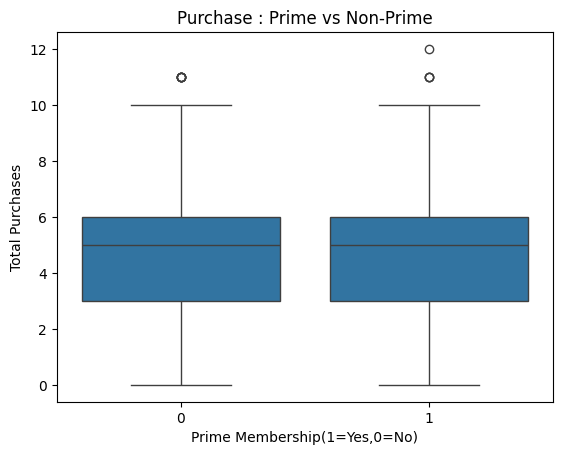

In [22]:
sns.boxplot(x="is_prime",y="total_purchases",data=df)
plt.title("Purchase : Prime vs Non-Prime")
plt.xlabel("Prime Membership(1=Yes,0=No)")
plt.ylabel("Total Purchases")
plt.show()

----------Average Order Value--------------

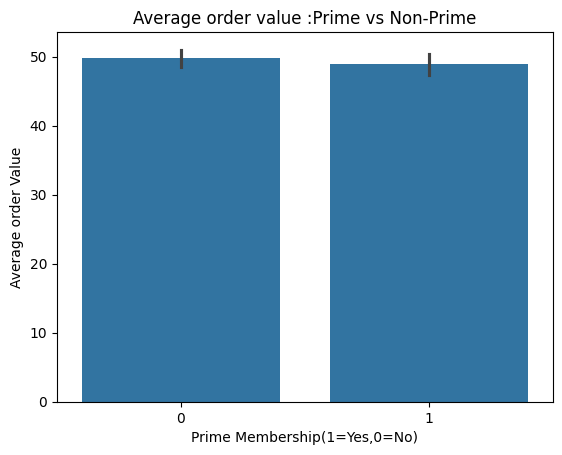

In [23]:
sns.barplot(x="is_prime",y="avg_order_value",data=df)
plt.title("Average order value :Prime vs Non-Prime")
plt.xlabel("Prime Membership(1=Yes,0=No)")
plt.ylabel("Average order Value")
plt.show()

-----------Total Spend Comparison--------------

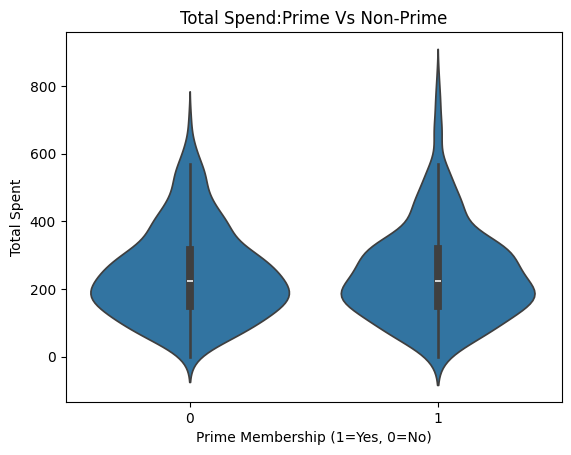

In [24]:
sns.violinplot(x="is_prime",y="total_spent",data=df)
plt.title("Total Spend:Prime Vs Non-Prime")
plt.xlabel("Prime Membership (1=Yes, 0=No)")
plt.ylabel("Total Spent")
plt.show()

--------Return Behaviour-----------

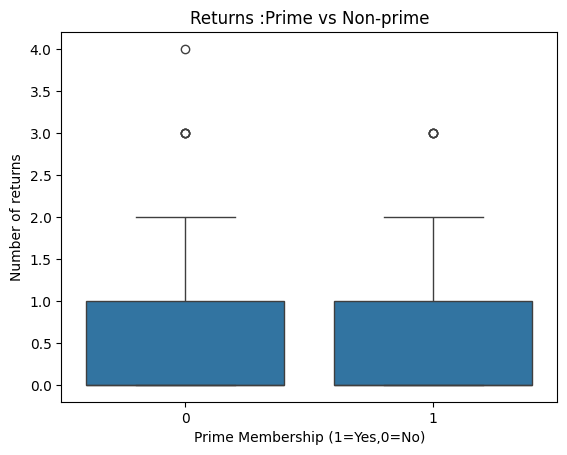

In [26]:
sns.boxplot(x="is_prime",y="returns",data=df)
plt.title("Returns :Prime vs Non-prime")
plt.xlabel("Prime Membership (1=Yes,0=No)")
plt.ylabel("Number of returns")
plt.show()

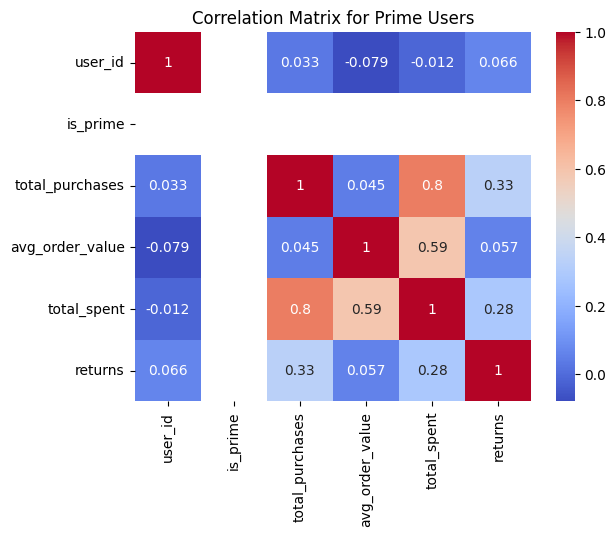

In [27]:
prime_df=df[df["is_prime"]==1]
sns.heatmap(prime_df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix for Prime Users")
plt.show()

prime_df = df[df["is_prime"] == 1]
Filters the DataFrame df to include only Prime users (is_prime == 1).

Stores the filtered data in a new DataFrame called prime_df.

python
Copy code
sns.heatmap(prime_df.corr(), annot=True, cmap="coolwarm")
Uses Seaborn to plot a heatmap of correlation values between all numeric columns in prime_df.

prime_df.corr() computes the correlation matrix: how strongly each pair of variables (e.g., purchases vs. returns) are linearly related (range: -1 to 1).

annot=True displays the actual correlation values inside the heatmap.

cmap="coolwarm" gives the heatmap a color gradient:
🔵 Negative correlation to 🔴 Positive correlation.

python
Copy code
plt.title("Correlation Matrix for Prime Users")
plt.show()
Adds a title to the plot.

plt.show() displays the heatmap.

🎯 Purpose:
To visualize relationships between numeric features (like purchases, order value, returns) for Prime users only.
This helps you understand which behaviors are linked.


The heatmap you're seeing is a correlation matrix for Amazon Prime users only. It shows how strongly each numeric column is linearly related to the others.

🔑 What is Correlation?
Ranges from -1 to 1:

+1 = Perfect positive correlation (when one increases, the other also increases)

-1 = Perfect negative correlation (when one increases, the other decreases)

0 = No correlation

📊 Key Relationships from the Heatmap:
Pair	                     Correlation	              Meaning

total_purchases ↔ total_spent	0.80	🔥 Strong positive: Prime users who purchase more also spend more.

avg_order_value ↔ total_spent	0.59	Moderate positive: Higher order value generally means more total spending.


returns ↔ total_purchases	   0.33	     Weak positive: More purchases slightly increase the number of returns.


returns ↔ total_spent	       0.28	       Weak positive: Users who spend more tend to return a little more.


avg_order_value ↔ total_purchases	0.045	Very weak: Order size doesn’t strongly affect purchase count.



user_id, is_prime	        Almost all near 0	      These aren't behavior features and show no meaningful correlation.

🎯 Insights:
Prime users show strong spending-purchase linkage (more buying → more spending).

Returns increase slightly with both purchases and spending.

Avg order value plays a smaller but notable role in total spend.

You can likely predict total_spent using total_purchases and avg_order_value.